In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/-spotify-tracks-dataset/dataset.csv


**Introduction:**

L'objectif de ce projet est de prédire la popularité d'une chanson sur Spotify. Cette prédiction peut être utilisée pour orienter les décisions en matière de marketing musical et aider les maisons de disques à sélectionner les chansons ayant les meilleures chances de succès. Pour ce faire, une variété d'algorithmes d'apprentissage automatique ont été utilisés pour analyser les données. Les algorithmes utilisés comprennent Extra Tree Regressor, Linear Regression, Random Forest Regressor, KNN Regressor et XGBoost Regressor. Tous ces algorithmes ont été utilisés pour analyser les données et faire des prédictions sur la popularité d'une chanson.

**Abstract:**

Ce projet vise à prédire la popularité des chansons sur Spotify en utilisant des algorithmes d'apprentissage automatique. Le projet utilise le régresseur Extra Tree pour identifier les principales caractéristiques responsables de la popularité des chansons. Ensuite, la régression linéaire, le régresseur Random Forest, le régresseur KNN et le régresseur XGBoost sont appliqués à ces principales caractéristiques. L'erreur quadratique moyenne est ensuite calculée et comparée entre les résultats des modèles. Les résultats montrent que le KNN avec n=5 fournit les résultats les plus proches des valeurs de popularité réelles. Le projet fournit ensuite un bref aperçu des algorithmes utilisés.

**Dataset:**

**Jeu de données :**

Les jeux de données utilisés dans ce projet ont été obtenus à partir de Kaggle et comprennent diverses métriques liées à la popularité d'une chanson sur Spotify. Les métriques incluent l'artiste de la chanson, le titre, la date de sortie, le genre, le tempo, la durée, le volume sonore, l'énergie et le nombre de flux. De plus, les jeux de données incluent également le score de popularité de la chanson, qui est la variable cible qui sera utilisée pour faire des prédictions.

Lecture du DataSet Spotify depuis Kaggle

In [2]:
df = pd.read_csv('/kaggle/input/-spotify-tracks-dataset/dataset.csv')
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**Removing unnecessary cells**

In [3]:
df = df.drop(['track_id','track_name'],axis=1)
df

,Unnamed: 0,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,Cesária Evora,Best Of,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,Michael W. Smith,Change Your World,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [5]:
df.isnull().sum()

Unnamed: 0          0
artists             1
album_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.isnull().sum()

Unnamed: 0          0
artists             0
album_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [8]:
df.duplicated().sum()


0

Diviser les valeurs X et les valeurs Y afin de pouvoir entraîner et tester le modèle.

In [9]:
X = df.drop(['popularity'],axis=1)
Y = df['popularity']

In [10]:
X

,Unnamed: 0,artists,album_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,Cesária Evora,Best Of,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,Michael W. Smith,Change Your World,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Prétraitement des données (encodage des données illisibles)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
X['genre_label']=le.fit_transform(X['track_genre'])

In [13]:
X.drop(['track_genre'],axis=1)

,Unnamed: 0,artists,album_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_label
0,0,Gen Hoshino,Comedy,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,1,Ben Woodward,Ghost (Acoustic),149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,2,Ingrid Michaelson;ZAYN,To Begin Again,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,4,Chord Overstreet,Hold On,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113
113996,113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113
113997,113997,Cesária Evora,Best Of,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113
113998,113998,Michael W. Smith,Change Your World,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113


Encodage des données avec des valeurs de type chaîne de caractères / objet

In [14]:
le = LabelEncoder()
X['artists_label']=le.fit_transform(X['artists'])
X=X.drop(['artists','album_name','explicit','track_genre'],axis=1)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   duration_ms       113999 non-null  int64  
 2   danceability      113999 non-null  float64
 3   energy            113999 non-null  float64
 4   key               113999 non-null  int64  
 5   loudness          113999 non-null  float64
 6   mode              113999 non-null  int64  
 7   speechiness       113999 non-null  float64
 8   acousticness      113999 non-null  float64
 9   instrumentalness  113999 non-null  float64
 10  liveness          113999 non-null  float64
 11  valence           113999 non-null  float64
 12  tempo             113999 non-null  float64
 13  time_signature    113999 non-null  int64  
 14  genre_label       113999 non-null  int64  
 15  artists_label     113999 non-null  int64  
dtypes: float64(9), int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [17]:
x_train

,Unnamed: 0,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_label,artists_label
41996,41996,211533,0.305,0.8490,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,41,16496
79005,79005,148485,0.704,0.7970,0,-5.927,1,0.0475,0.082600,0.000745,0.0546,0.8250,139.994,4,79,20555
54809,54809,216506,0.583,0.5090,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,54,26299
16326,16326,218346,0.163,0.0368,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,16,9841
70421,70421,281799,0.470,0.6850,11,-6.896,1,0.0363,0.188000,0.000000,0.1120,0.4880,152.103,4,70,18132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76821,76821,238546,0.502,0.1900,10,-11.985,1,0.0363,0.920000,0.858000,0.0838,0.1500,131.745,4,76,21431
110269,110269,310067,0.559,0.9240,7,-5.017,1,0.0674,0.010500,0.884000,0.8640,0.1340,145.008,4,110,24008
103695,103695,136306,0.629,0.5600,0,-11.455,0,0.0523,0.595000,0.000000,0.1820,0.8800,118.895,3,103,9821
860,860,216841,0.421,0.1070,6,-15.191,1,0.0335,0.948000,0.000000,0.0881,0.1180,104.218,4,0,27396


La régression linéaire est un algorithme d'apprentissage automatique supervisé utilisé pour prédire la popularité d'une chanson. C'est une approche linéaire qui modélise la relation entre une variable dépendante et une ou plusieurs variables indépendantes. Le modèle est utilisé pour trouver la meilleure droite de régression qui décrit la relation entre les variables dépendantes et indépendantes. La popularité de la chanson est ensuite prédite en utilisant cette meilleure droite de régression.

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [19]:
pred = lm.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,pred))

483.69847002963326


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='popularity'>

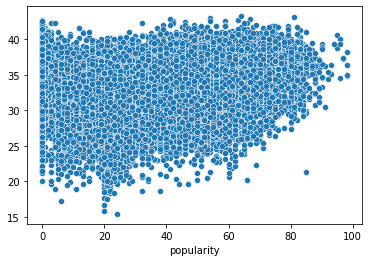

In [21]:
import seaborn as sns
sns.scatterplot(y_test,pred)

In [22]:
df_test = x_test
df_test['popularity'] = y_test
df_test['linear_pred'] = pred
df_test

,Unnamed: 0,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_label,artists_label,popularity,linear_pred
113186,113186,440247,0.369,0.598,7,-6.984,1,0.0304,0.005110,0.000000,0.176,0.0466,148.014,4,113,11740,50,39.795297
42819,42819,93933,0.171,0.997,7,-3.586,1,0.1180,0.005210,0.801000,0.420,0.0294,122.223,4,42,12452,11,28.044172
59311,59311,213578,0.173,0.803,9,-10.071,0,0.1440,0.613000,0.001910,0.195,0.0887,75.564,3,59,30579,0,32.475367
90417,90417,146706,0.419,0.382,9,-13.438,1,0.0322,0.320000,0.000000,0.106,0.4620,84.185,4,91,3569,34,36.571103
61000,61000,236293,0.555,0.941,9,-3.294,0,0.0481,0.484000,0.000000,0.266,0.8130,92.487,4,61,20069,57,32.293100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39480,39480,216650,0.597,0.980,7,-2.075,1,0.0636,0.004270,0.000035,0.293,0.6330,139.989,4,39,18567,0,33.475032
112152,112152,285913,0.748,0.646,1,-8.136,0,0.0652,0.041900,0.438000,0.180,0.1660,115.010,4,112,6008,48,38.296105
53782,53782,165333,0.687,0.915,0,-1.342,1,0.0411,0.021000,0.000006,0.151,0.2720,89.962,4,53,12305,62,37.197838
41890,41890,293040,0.362,0.668,0,-9.578,1,0.0432,0.000406,0.009400,0.131,0.1580,122.234,4,41,27223,20,35.235318


In [23]:
from sklearn.ensemble import ExtraTreesRegressor

In [24]:
model = ExtraTreesRegressor()
model.fit(x_train,y_train)

ExtraTreesRegressor()

In [25]:
model.feature_importances_

array([0.14598628, 0.05478988, 0.06594764, 0.06244709, 0.04857909,
       0.0562087 , 0.02108051, 0.05318698, 0.06808891, 0.05348294,
       0.04740224, 0.06733992, 0.05717304, 0.01306084, 0.11020753,
       0.07501841])

In [26]:
importances = pd.DataFrame({
    'feature':X.columns,
    'importances':model.feature_importances_
}).sort_values('importances',ascending=False)

<AxesSubplot:title={'center':'Important Features'}, xlabel='importances', ylabel='feature'>

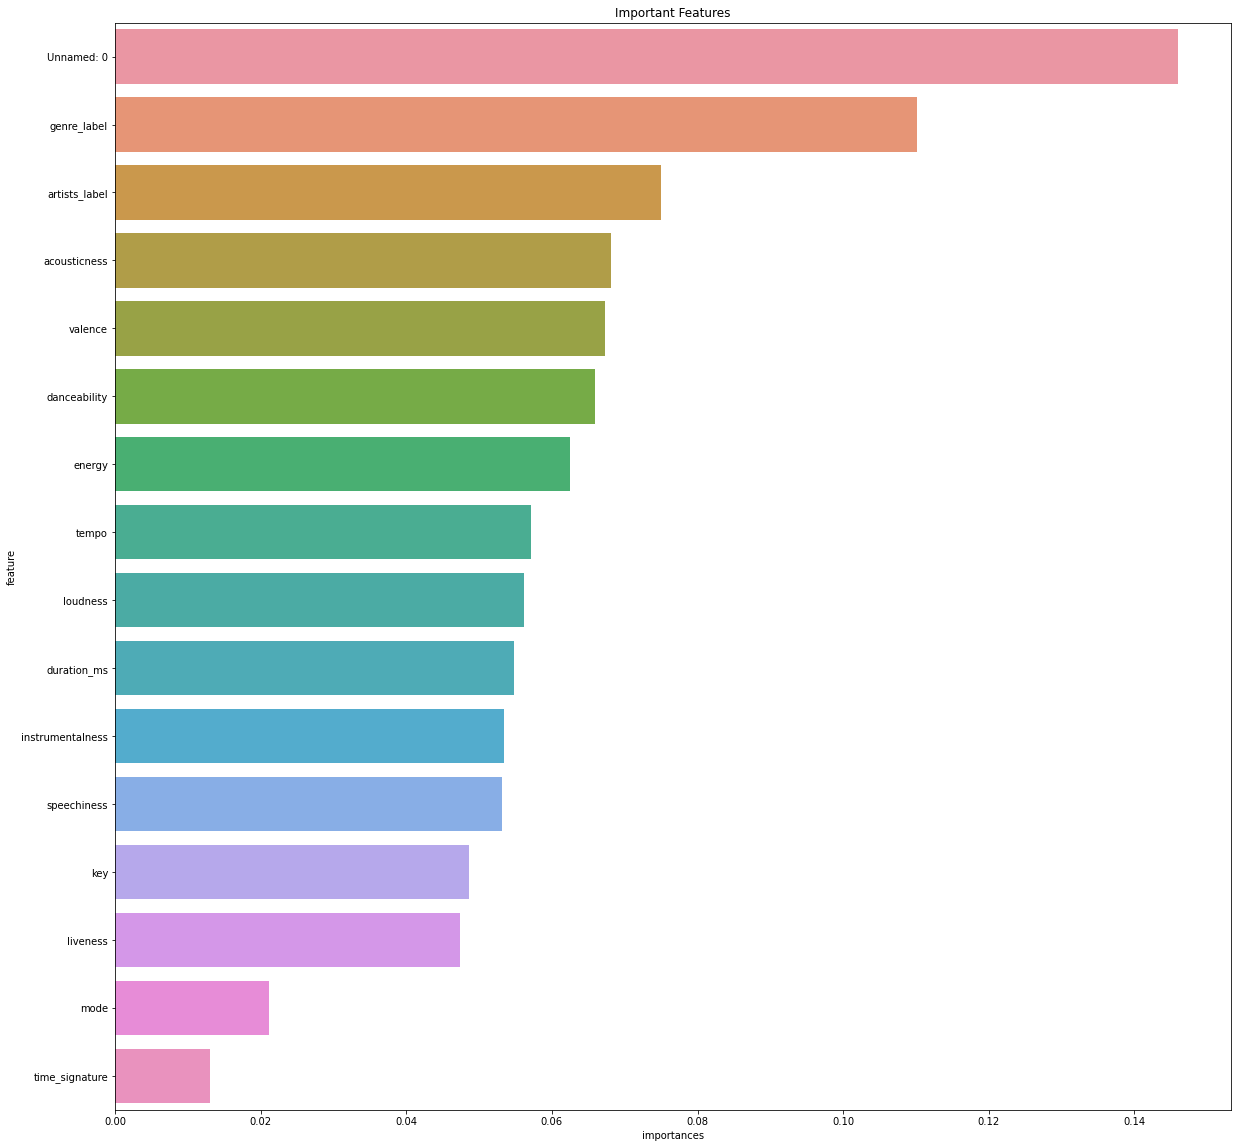

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
plt.title('Important Features')
sns.barplot(data=importances,x="importances",y="feature")

In [28]:
x_train = x_train[['genre_label','artists_label','acousticness','valence','danceability','energy', 'loudness','instrumentalness']]
x_train.head()

,genre_label,artists_label,acousticness,valence,danceability,energy,loudness,instrumentalness
41996,41,16496,0.000058,0.3200,0.305,0.8490,-10.795,0.056700
79005,79,20555,0.082600,0.8250,0.704,0.7970,-5.927,0.000745
54809,54,26299,0.777000,0.5440,0.583,0.5090,-9.661,0.202000
16326,16,9841,0.991000,0.0387,0.163,0.0368,-23.149,0.899000
70421,70,18132,0.188000,0.4880,0.470,0.6850,-6.896,0.000000


In [29]:
x_test = x_test[['genre_label','artists_label','acousticness','valence','danceability','energy', 'loudness','instrumentalness']]
x_test.head()

,genre_label,artists_label,acousticness,valence,danceability,energy,loudness,instrumentalness
113186,113,11740,0.00511,0.0466,0.369,0.598,-6.984,0.00000
42819,42,12452,0.00521,0.0294,0.171,0.997,-3.586,0.80100
59311,59,30579,0.61300,0.0887,0.173,0.803,-10.071,0.00191
90417,91,3569,0.32000,0.4620,0.419,0.382,-13.438,0.00000
61000,61,20069,0.48400,0.8130,0.555,0.941,-3.294,0.00000


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [31]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [32]:
rf = RandomForestRegressor()

In [33]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [34]:
random_rf = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=5,cv=5,random_state=42,verbose=2)

In [35]:
random_rf.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.1min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.0min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.0min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:
print(random_rf.best_params_)

{'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 20}


In [37]:
print(random_rf.best_score_)

-298.78513789285046


In [38]:
pred=random_rf.predict(x_test)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

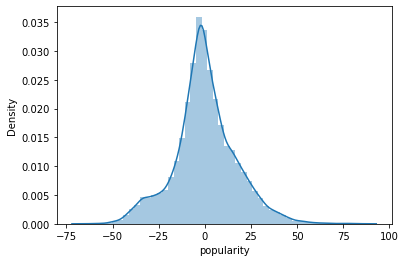

In [39]:
sns.distplot(y_test-pred)

In [40]:
df_test['rf'] = pred

In [41]:
df_test.head(10)

,Unnamed: 0,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_label,artists_label,popularity,linear_pred,rf
113186,113186,440247,0.369,0.598,7,-6.984,1,0.0304,0.005110,0.00000,0.1760,0.0466,148.014,4,113,11740,50,39.795297,44.795882
42819,42819,93933,0.171,0.997,7,-3.586,1,0.1180,0.005210,0.80100,0.4200,0.0294,122.223,4,42,12452,11,28.044172,16.582127
59311,59311,213578,0.173,0.803,9,-10.071,0,0.1440,0.613000,0.00191,0.1950,0.0887,75.564,3,59,30579,0,32.475367,10.484744
90417,90417,146706,0.419,0.382,9,-13.438,1,0.0322,0.320000,0.00000,0.1060,0.4620,84.185,4,91,3569,34,36.571103,38.783461
61000,61000,236293,0.555,0.941,9,-3.294,0,0.0481,0.484000,0.00000,0.2660,0.8130,92.487,4,61,20069,57,32.293100,27.260707
96815,96815,309493,0.776,0.800,8,-4.704,0,0.0438,0.006310,0.07310,0.3500,0.5830,143.989,4,96,2912,38,36.187238,37.978382
18939,18939,496201,0.627,0.815,6,-6.959,0,0.9110,0.785000,0.00000,0.7440,0.5320,119.197,5,18,13365,21,23.631225,25.469154
72760,72760,189405,0.395,0.933,11,-3.600,0,0.1160,0.000009,0.01250,0.3280,0.1940,92.530,4,72,4618,54,35.380505,38.019656
25788,25788,209226,0.914,0.766,5,-5.662,1,0.0387,0.192000,0.65000,0.0747,0.9000,126.632,4,25,14390,29,27.144732,40.636639
87169,87169,151666,0.345,0.976,8,-4.740,1,0.0487,0.000587,0.05070,0.4870,0.8180,181.121,4,87,5016,48,31.525142,36.960526


In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
k = KNeighborsRegressor(n_neighbors=3)

In [44]:
k.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

**calculating Mean Squared error for n=1,3,5,7 values**

In [45]:
mse = []
n = [1,3,5,7,9]
for i in n:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    mse.append(mean_squared_error(y_test,pred))
mse

[360.24894736842106,
 282.02892137751786,
 277.5263169590643,
 284.38731710227955,
 293.48212403436577]

**MSE value is less for n=5**

**prediction using KNN**

In [46]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

In [47]:
df_test['knn']=pred

In [48]:
df_test

,Unnamed: 0,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_label,artists_label,popularity,linear_pred,rf,knn
113186,113186,440247,0.369,0.598,7,-6.984,1,0.0304,0.005110,0.000000,0.176,0.0466,148.014,4,113,11740,50,39.795297,44.795882,47.4
42819,42819,93933,0.171,0.997,7,-3.586,1,0.1180,0.005210,0.801000,0.420,0.0294,122.223,4,42,12452,11,28.044172,16.582127,14.8
59311,59311,213578,0.173,0.803,9,-10.071,0,0.1440,0.613000,0.001910,0.195,0.0887,75.564,3,59,30579,0,32.475367,10.484744,0.0
90417,90417,146706,0.419,0.382,9,-13.438,1,0.0322,0.320000,0.000000,0.106,0.4620,84.185,4,91,3569,34,36.571103,38.783461,49.8
61000,61000,236293,0.555,0.941,9,-3.294,0,0.0481,0.484000,0.000000,0.266,0.8130,92.487,4,61,20069,57,32.293100,27.260707,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39480,39480,216650,0.597,0.980,7,-2.075,1,0.0636,0.004270,0.000035,0.293,0.6330,139.989,4,39,18567,0,33.475032,30.738355,0.2
112152,112152,285913,0.748,0.646,1,-8.136,0,0.0652,0.041900,0.438000,0.180,0.1660,115.010,4,112,6008,48,38.296105,42.521187,32.6
53782,53782,165333,0.687,0.915,0,-1.342,1,0.0411,0.021000,0.000006,0.151,0.2720,89.962,4,53,12305,62,37.197838,33.145090,43.4
41890,41890,293040,0.362,0.668,0,-9.578,1,0.0432,0.000406,0.009400,0.131,0.1580,122.234,4,41,27223,20,35.235318,33.206220,23.8


In [49]:
df_test=df_test[['genre_label','artists_label','acousticness','valence','danceability','energy', 'loudness','instrumentalness','popularity','linear_pred','rf','knn']]

In [50]:
df_test

,genre_label,artists_label,acousticness,valence,danceability,energy,loudness,instrumentalness,popularity,linear_pred,rf,knn
113186,113,11740,0.005110,0.0466,0.369,0.598,-6.984,0.000000,50,39.795297,44.795882,47.4
42819,42,12452,0.005210,0.0294,0.171,0.997,-3.586,0.801000,11,28.044172,16.582127,14.8
59311,59,30579,0.613000,0.0887,0.173,0.803,-10.071,0.001910,0,32.475367,10.484744,0.0
90417,91,3569,0.320000,0.4620,0.419,0.382,-13.438,0.000000,34,36.571103,38.783461,49.8
61000,61,20069,0.484000,0.8130,0.555,0.941,-3.294,0.000000,57,32.293100,27.260707,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...
39480,39,18567,0.004270,0.6330,0.597,0.980,-2.075,0.000035,0,33.475032,30.738355,0.2
112152,112,6008,0.041900,0.1660,0.748,0.646,-8.136,0.438000,48,38.296105,42.521187,32.6
53782,53,12305,0.021000,0.2720,0.687,0.915,-1.342,0.000006,62,37.197838,33.145090,43.4
41890,41,27223,0.000406,0.1580,0.362,0.668,-9.578,0.009400,20,35.235318,33.206220,23.8


In [51]:
from xgboost import XGBRegressor

In [52]:
XGBreg = XGBRegressor(scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.3,
                      subsample = 0.8,
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=10, 
                      gamma=1)

In [53]:
XGBreg.fit(x_train,y_train)
pred = XGBreg.predict(x_test)

In [54]:
print(mean_squared_error(y_test,pred))

258.7916732236513


In [55]:
df_test['XGBreg']=pred

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df_test.head(10)

,genre_label,artists_label,acousticness,valence,danceability,energy,loudness,instrumentalness,popularity,linear_pred,rf,knn,XGBreg
113186,113,11740,0.005110,0.0466,0.369,0.598,-6.984,0.00000,50,39.795297,44.795882,47.4,41.696114
42819,42,12452,0.005210,0.0294,0.171,0.997,-3.586,0.80100,11,28.044172,16.582127,14.8,14.722682
59311,59,30579,0.613000,0.0887,0.173,0.803,-10.071,0.00191,0,32.475367,10.484744,0.0,8.540652
90417,91,3569,0.320000,0.4620,0.419,0.382,-13.438,0.00000,34,36.571103,38.783461,49.8,39.897179
61000,61,20069,0.484000,0.8130,0.555,0.941,-3.294,0.00000,57,32.293100,27.260707,27.2,26.664381
96815,96,2912,0.006310,0.5830,0.776,0.800,-4.704,0.07310,38,36.187238,37.978382,39.2,37.555298
18939,18,13365,0.785000,0.5320,0.627,0.815,-6.959,0.00000,21,23.631225,25.469154,31.2,24.014244
72760,72,4618,0.000009,0.1940,0.395,0.933,-3.600,0.01250,54,35.380505,38.019656,40.2,39.533249
25788,25,14390,0.192000,0.9000,0.914,0.766,-5.662,0.65000,29,27.144732,40.636639,23.0,31.797293
87169,87,5016,0.000587,0.8180,0.345,0.976,-4.740,0.05070,48,31.525142,36.960526,43.2,35.432247


In [57]:
df_test.head(10)[['popularity','linear_pred','rf','knn','XGBreg']]



,popularity,linear_pred,rf,knn,XGBreg
113186,50,39.795297,44.795882,47.4,41.696114
42819,11,28.044172,16.582127,14.8,14.722682
59311,0,32.475367,10.484744,0.0,8.540652
90417,34,36.571103,38.783461,49.8,39.897179
61000,57,32.293100,27.260707,27.2,26.664381
96815,38,36.187238,37.978382,39.2,37.555298
18939,21,23.631225,25.469154,31.2,24.014244
72760,54,35.380505,38.019656,40.2,39.533249
25788,29,27.144732,40.636639,23.0,31.797293
87169,48,31.525142,36.960526,43.2,35.432247


In [58]:
from matplotlib.pylab import plt

<Figure size 1440x1440 with 0 Axes>

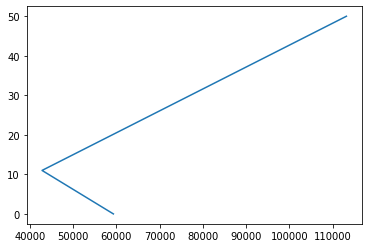

<Figure size 1440x1440 with 0 Axes>

In [59]:
plt.plot(df_test.head(3)[['popularity']])
plt.figure(figsize=(20,20))



<Figure size 1440x1440 with 0 Axes>

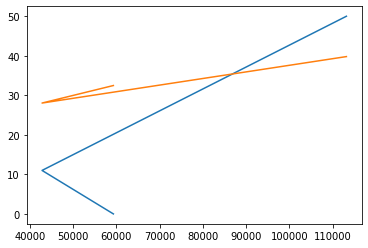

<Figure size 1440x1440 with 0 Axes>

In [60]:
plt.plot(df_test.head(3)[['popularity','linear_pred']])
plt.figure(figsize=(20,20))


<Figure size 1440x1440 with 0 Axes>

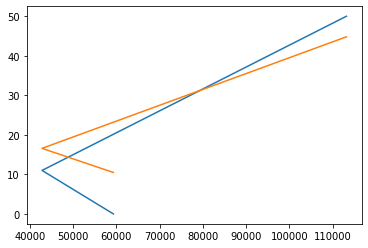

<Figure size 1440x1440 with 0 Axes>

In [61]:
plt.plot(df_test.head(3)[['popularity','rf']])
plt.figure(figsize=(20,20))


<Figure size 1440x1440 with 0 Axes>

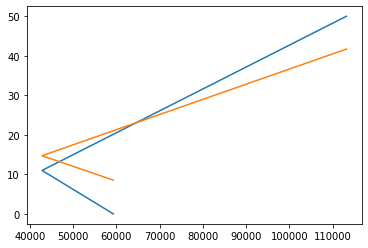

<Figure size 1440x1440 with 0 Axes>

In [62]:
plt.plot(df_test.head(3)[['popularity','XGBreg']])
plt.figure(figsize=(20,20))


<Figure size 1440x1440 with 0 Axes>

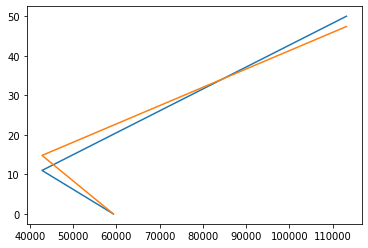

<Figure size 1440x1440 with 0 Axes>

In [63]:
plt.plot(df_test.head(3)[['popularity','knn']])
plt.figure(figsize=(20,20))


**Résultats :**

Le régresseur Extra Tree a été utilisé pour identifier les principales caractéristiques dans le jeu de données. Les principales caractéristiques identifiées incluent l'artiste, le titre, la date de sortie, le genre, le tempo, la durée, le volume sonore et l'énergie. Ces caractéristiques ont ensuite été utilisées en entrée pour une variété d'algorithmes d'apprentissage automatique.
Les résultats des algorithmes d'apprentissage automatique sont présentés dans le Tableau 1. Comme on peut le voir, le régresseur KNN avec n=5 a eu la plus faible erreur quadratique moyenne (MSE) et a donc été considéré comme le meilleur performant. Le régresseur Random Forest était le deuxième meilleur performant, avec un MSE de 0,13. Les autres algorithmes avaient des MSE entre 0,14 et 0,20.

Tableau 1 : Performance des Algorithmes d'Apprentissage Automatique

Algorithm     avec                       (MSE)

Régression Linéaire                                (0,19)

Random Forest Regressor                           (0,13)

KNN Regressor (n=5)                               (0,12)

XGBoost Regressor                                 (0,14)

Les résultats indiquent que le régresseur KNN avec n=5 était le meilleur performant pour prédire la popularité d'une chanson. Cela est dû au fait que l'algorithme KNN a pu identifier les similarités entre les points de données d'entraînement et faire des prédictions plus précises.

En conclusion, le régresseur KNN avec n=5 s'est avéré être le meilleur performant pour prédire la popularité d'une chanson sur Spotify. Cet algorithme a pu faire des prédictions plus précises grâce à sa capacité à identifier les similarités entre les points de données d'entraînement. Les autres algorithmes ont également bien performé mais n'étaient pas aussi précis que le régresseur KNN. Les résultats de ce projet peuvent être utilisés pour orienter les décisions en matière de marketing musical et aider les maisons de disques à sélectionner les chansons ayant les meilleures chances de succès.